In [2]:
%run MakeDataset.py

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [3]:
from MakeDataset import X_train,X_test,y_train,y_test

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [10]:
activity = {
    1: "WALKING",
    2: "WALKING UPSTAIRS",
    3: "WALKING DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

Accuracy: 0.65
Precision: 0.65
Recall: 0.65


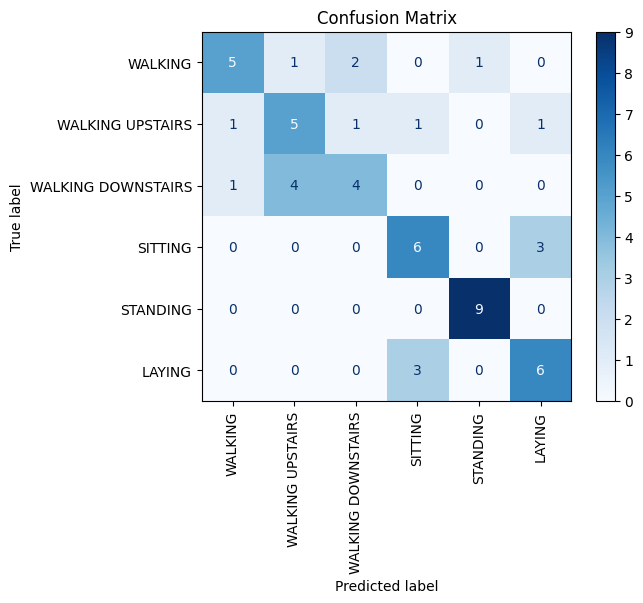

In [16]:
X_train_total_acc = np.sum(X_train**2, axis=2)
X_test_total_acc = np.sum(X_test**2, axis=2)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_total_acc, y_train)

y_pred = model.predict(X_test_total_acc)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

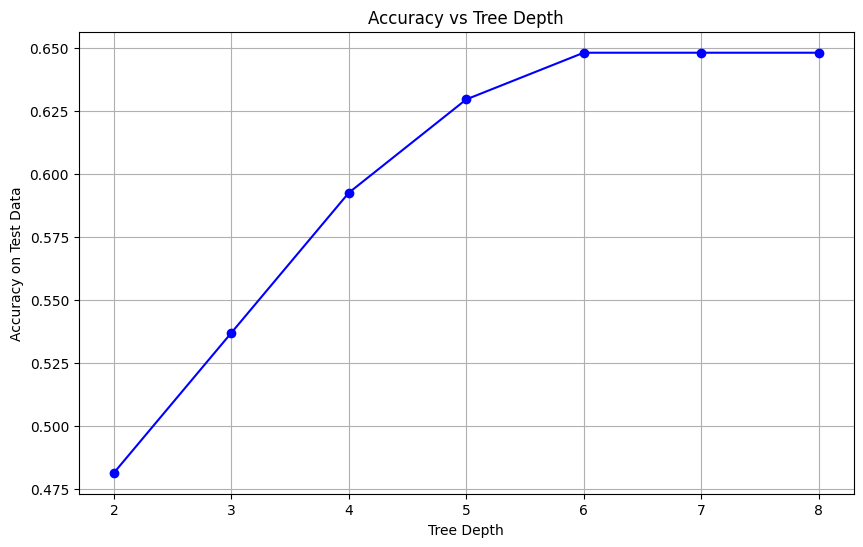

In [17]:
depths = range(2, 9)
accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_total_acc, y_train)
    
    y_pred = model.predict(X_test_total_acc)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy on Test Data')
plt.grid(True)
plt.show()